In [54]:
import datetime as dt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [55]:
company = '^TNX'
start = dt.datetime(2012,1,1)
end = dt.datetime(2015,1,1)

data = web.DataReader(company, 'yahoo', start=start, end=end)


In [56]:
#Prepare Data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60
future_day_predicted = 7

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data) - future_day_predicted + 1):
    x_train.append(scaled_data[x-prediction_days:x, 0 ])  # First iteration: x=60 =>  - 60 => 0:60
    y_train.append(scaled_data[x + future_day_predicted - 1,0])


x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Making x_train 3d with last dimension = 1

In [57]:
x_train.shape

(689, 60, 1)

In [72]:
# Build the Model

# model = Sequential ()

# model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))


# model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)




Epoch 1/25
22/22 [==============================] - 1s 48ms/step - loss: 0.0089
Epoch 2/25
22/22 [==============================] - 1s 47ms/step - loss: 0.0085
Epoch 3/25
22/22 [==============================] - 1s 47ms/step - loss: 0.0085
Epoch 4/25
22/22 [==============================] - 1s 48ms/step - loss: 0.0089
Epoch 5/25
22/22 [==============================] - 1s 46ms/step - loss: 0.0093
Epoch 6/25
22/22 [==============================] - 1s 48ms/step - loss: 0.0096
Epoch 7/25
22/22 [==============================] - 1s 57ms/step - loss: 0.0091
Epoch 8/25
22/22 [==============================] - 1s 60ms/step - loss: 0.0093
Epoch 9/25
22/22 [==============================] - 1s 52ms/step - loss: 0.0088
Epoch 10/25
 3/22 [===>..........................] - ETA: 0s - loss: 0.0087

KeyboardInterrupt: 

In [59]:
model.input_shape

(None, 60, 1)

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 dense_2 (Dense)             (None, 60, 1)             51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [73]:

#TESTING THE MODEL
test_start = dt.datetime(2016,1,1)
test_end = dt.datetime(2021,1,1)

test_data = web.DataReader(company, 'yahoo', test_start,  test_end)
actual_prices = test_data['Close'].values[future_day_predicted - 1:]

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)


model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)


In [74]:

#Make predictions on test data

x_test = []

for x in range(prediction_days, len(model_inputs) - future_day_predicted + 1):
    x_test.append(model_inputs[x-prediction_days:x, 0 ])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)




40/40 [==============================] - 1s 17ms/step


In [70]:
predicted_prices.shape

(1251, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


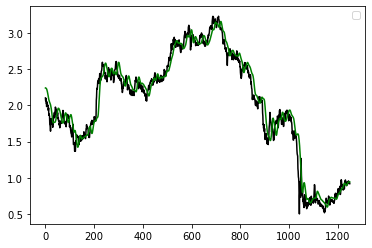

In [75]:


#PLOT

plt.plot(actual_prices, color='black')
plt.plot(predicted_prices, color='green')

plt.legend()
plt.show()
    